In [1]:
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test  = to_categorical(y_test, NUM_CLASSES)

In [3]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model

input_layer = Input((32, 32, 3))

conv_layer_1 = Conv2D(
    filters=10,
    kernel_size=(4, 4),
    strides=2,
    padding='same')(input_layer)

conv_layer_2 = Conv2D(
    filters=20,
    kernel_size=(3, 3),
    strides=2,
    padding='same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [6]:
model.fit(x_train,
            y_train,
            batch_size=32,
            epochs=10,
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8392 - accuracy: 0.3609
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7310 - accuracy: 0.4082
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7147 - accuracy: 0.4139
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7059 - accuracy: 0.4179
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6981 - accuracy: 0.4231
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6920 - accuracy: 0.4216
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6875 - accuracy: 0.4262
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6835 - accuracy: 0.4262
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6791 - accuracy: 0.4284
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.674

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7137 - accuracy: 0.4096


[1.7136940956115723, 0.40959998965263367]

In [8]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

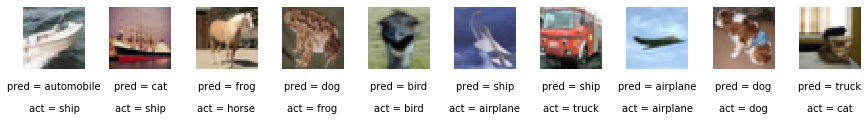

In [10]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show() 